# **data importation from drive & data cleaning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir data
!cp "/content/drive/MyDrive/ML_Project1/client_train.csv"  ./data


Mounted at /content/drive


In [ ]:
import csv
import pandas as pd

datafile = "/content/drive/MyDrive/ML_Project1/client_train.csv"
dataClient = pd.read_csv(datafile)

In [ ]:
!cp "/content/drive/MyDrive/ML_Project1/invoice_train.csv"  ./data1
datafile1 = "/content/drive/MyDrive/ML_Project1/invoice_train.csv"
data = pd.read_csv(datafile1)
data.isnull() #cheking the null values

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4476745,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4476746,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4476747,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataClient.groupby(['target'])['client_id'].count()
data['counter_type'] = data['counter_type'].map({"ELEC":1,"GAZ":0})
data['counter_statue'] = data['counter_statue'].map({0:0,1:1,2:2,3:3,4:4,5:5,769:5,'0':0,'5':5,'1':1,'4':4,'A':0,618:5,269375:5,46:5,420:5})

In [ ]:
data.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,1
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,1
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,1
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,1
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,1


In [ ]:
dataClient.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [ ]:
dataClient.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
135488    False
135489    False
135490    False
135491    False
135492    False
Length: 135493, dtype: bool

In [ ]:
data.duplicated()


0          False
1          False
2          False
3          False
4          False
           ...  
4476744    False
4476745    False
4476746    False
4476747    False
4476748    False
Length: 4476749, dtype: bool

In [ ]:
data.drop_duplicates()
dataClient.drop_duplicates()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0
...,...,...,...,...,...,...
135488,62,train_Client_99995,11,304,26/07/2004,0.0
135489,63,train_Client_99996,11,311,25/10/2012,0.0
135490,63,train_Client_99997,11,311,22/11/2011,0.0
135491,60,train_Client_99998,11,101,22/12/1993,0.0


In [ ]:
#dataClient['target'].describe()
#dataClient['region'].describe()
#dataClient['client_catg'].describe()
#dataClient['client_id'].describe()
dataClient['disrict'].describe()

count    135493.000000
mean         63.511222
std           3.354400
min          60.000000
25%          62.000000
50%          62.000000
75%          69.000000
max          69.000000
Name: disrict, dtype: float64

In [ ]:
data['counter_code'].describe()
data['old_index'].describe()
data['new_index'].describe()

count    4.476749e+06
mean     1.834970e+04
std      4.095321e+04
min      0.000000e+00
25%      2.056000e+03
50%      8.192000e+03
75%      2.234300e+04
max      2.870972e+06
Name: new_index, dtype: float64

In [ ]:
data.head(12)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,index
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,NaN,82
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,NaN,1384
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,NaN,123
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,NaN,102
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,NaN,572
5,train_Client_0,2017-07-17,11,1335667,0,207,9,1,314,0,0,0,15638,15952,8,NaN,314
6,train_Client_0,2018-12-07,11,1335667,0,207,9,1,541,0,0,0,15952,16493,12,NaN,541
7,train_Client_0,2019-03-19,11,1335667,0,207,9,1,585,0,0,0,16493,17078,8,NaN,585
8,train_Client_0,2011-07-22,11,1335667,0,203,9,1,1200,186,0,0,7770,9156,4,NaN,1386
9,train_Client_0,2011-11-22,11,1335667,0,203,6,1,1082,0,0,0,9156,10238,4,NaN,1082


In [ ]:
dataClient.head(12)

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0
5,69,train_Client_10000,11,103,29/09/1993,0.0
6,62,train_Client_100000,11,309,07/06/2012,0.0
7,60,train_Client_100001,11,101,12/04/2006,0.0
8,62,train_Client_100002,11,301,31/12/2006,0.0
9,60,train_Client_100003,11,101,25/10/2011,0.0


In [ ]:
data.groupby('client_id')

In [ ]:
data.head(11)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
5,train_Client_0,2017-07-17,11,1335667,0,207,9,1,314,0,0,0,15638,15952,8,ELEC
6,train_Client_0,2018-12-07,11,1335667,0,207,9,1,541,0,0,0,15952,16493,12,ELEC
7,train_Client_0,2019-03-19,11,1335667,0,207,9,1,585,0,0,0,16493,17078,8,ELEC
8,train_Client_0,2011-07-22,11,1335667,0,203,9,1,1200,186,0,0,7770,9156,4,ELEC
9,train_Client_0,2011-11-22,11,1335667,0,203,6,1,1082,0,0,0,9156,10238,4,ELEC


In [ ]:
 dataClient.sort_values(by="target",ascending=False)


,disrict,client_id,client_catg,region,creation_date,target
60530,63,train_Client_32530,11,311,20/05/2005,1.0
63140,60,train_Client_34880,11,101,08/02/2011,1.0
106172,62,train_Client_73609,11,304,23/11/1998,1.0
63162,63,train_Client_3490,11,313,03/06/2008,1.0
31035,69,train_Client_127929,51,103,26/03/2015,1.0
...,...,...,...,...,...,...
46453,69,train_Client_19862,11,105,28/04/1986,0.0
46452,69,train_Client_19861,11,104,04/07/2013,0.0
46451,63,train_Client_19860,11,101,23/05/1996,0.0
46450,62,train_Client_1986,11,302,14/03/2014,0.0


**Graphs Fro Explain Our EDA**

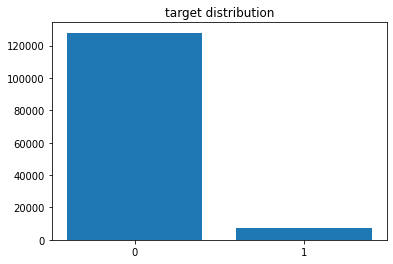

In [ ]:
import matplotlib.pyplot as plt
ds = dataClient.groupby(['target'])['client_id'].count()
plt.bar(x=ds.index, height=ds.values, tick_label =[0,1])
plt.title('target distribution')
plt.show()

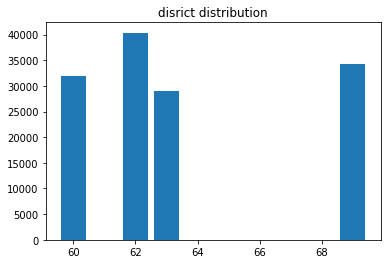

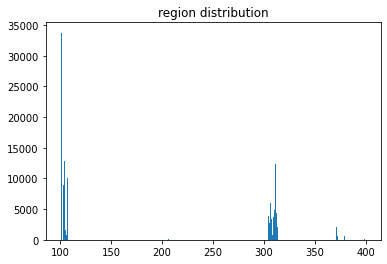

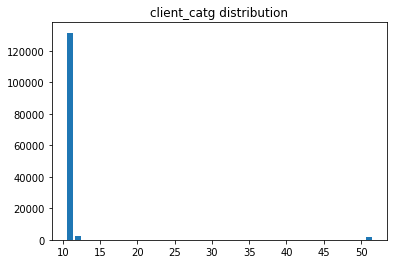

In [ ]:
for col in ['disrict','region','client_catg']:
    ds = dataClient.groupby([col])['client_id'].count()
    plt.bar(x=ds.index, height=ds.values)
    plt.title(col+' distribution')
    plt.show()

## **merge the two tables**

In [ ]:
full_data = pd.merge(data,
                      dataClient,
                      on = "client_id",
                      how = "inner")
full_data.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,...,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,...,0,14302,14384,4,ELEC,60,11,101,31/12/1994,0.0
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,...,0,12294,13678,4,ELEC,60,11,101,31/12/1994,0.0
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,...,0,14624,14747,4,ELEC,60,11,101,31/12/1994,0.0
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,...,0,14747,14849,4,ELEC,60,11,101,31/12/1994,0.0
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,...,0,15066,15638,12,ELEC,60,11,101,31/12/1994,0.0


## **creation of the training model using linear regression**

In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.linear_model import LinearRegression
y = full_data["target"]
X = full_data[["client_catg","region","disrict","counter_number","counter_code","reading_remarque"]]
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
#predictions



## **importation of the testing data from drive**

In [ ]:
!cp "/content/drive/MyDrive/ML_Project1/invoice_test.csv"  ./data1
datafile2 = "/content/drive/MyDrive/ML_Project1/invoice_test.csv"
dataTest = pd.read_csv(datafile2)


In [ ]:
!cp "/content/drive/MyDrive/ML_Project1/client_test.csv"  ./data1
datafile22 = "/content/drive/MyDrive/ML_Project1/client_test.csv"
dataClientTest = pd.read_csv(datafile22)

In [ ]:
full_dataT = pd.merge(dataClientTest,
                      dataTest,
                      on = "client_id",
                      how = "inner")
full_dataT

,disrict,client_id,client_catg,region,creation_date,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,62,test_Client_0,11,307,28/05/2002,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,62,test_Client_0,11,307,28/05/2002,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,62,test_Client_0,11,307,28/05/2002,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,62,test_Client_0,11,307,28/05/2002,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,62,test_Client_0,11,307,28/05/2002,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939725,69,test_Client_9999,11,104,14/03/1990,2010-03-11,11,869269,0,203,6,1,248,0,0,0,21114,21362,4,ELEC
1939726,69,test_Client_9999,11,104,14/03/1990,2011-03-15,11,869269,0,203,6,1,260,0,0,0,21362,21622,4,ELEC
1939727,69,test_Client_9999,11,104,14/03/1990,2012-12-03,11,869269,0,203,6,1,312,0,0,0,22272,22584,4,ELEC
1939728,69,test_Client_9999,11,104,14/03/1990,2009-07-01,11,869269,0,203,6,1,236,0,0,0,19909,20145,4,ELEC


## **testing the data**

In [ ]:
X_Test=full_dataT[["client_catg","region","disrict","counter_number","counter_code","reading_remarque"]]
predict = model.predict(X_Test)
predict
print(int(predict[0]))

0


## **results of the testing**

In [ ]:
results=X_Test.copy()
results['client_id']=dataClientTest['client_id']
results['target']=predict
results.head()

,client_catg,region,disrict,counter_number,counter_code,reading_remarque,client_id,target
0,11,307,62,651208,203,8,test_Client_0,0.076566
1,11,307,62,651208,203,8,test_Client_1,0.076566
2,11,307,62,651208,203,8,test_Client_10,0.076566
3,11,307,62,651208,203,9,test_Client_100,0.076061
4,11,307,62,651208,203,9,test_Client_1000,0.076061


**Define Lightgbm**

### **Training**

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier
model = LGBMClassifier(boosting_type='gbdt',num_iteration=500, silent=True)

#Fit to training data
%time model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


CPU times: user 4min 1s, sys: 470 ms, total: 4min 1s
Wall time: 2min 6s


LGBMClassifier(num_iteration=500)

## **testing**

In [ ]:
preds = model.predict_proba(X_Test)

In [ ]:
preds = pd.DataFrame(preds)

In [ ]:
preds.head()

,0,1
0,0.850262,0.149738
1,0.850262,0.149738
2,0.850262,0.149738
3,0.886212,0.113788
4,0.886212,0.113788


In [ ]:
submission = pd.DataFrame({
        "client_id": full_dataT["client_id"],
        "target": preds[1]
    })
submission.to_csv('submission.csv', index=False)

In [ ]:
submission.head()


,client_id,target
0,test_Client_0,0.149738
1,test_Client_0,0.149738
2,test_Client_0,0.149738
3,test_Client_0,0.113788
4,test_Client_0,0.113788
